# Keras model experamentation
- with the other models performing very well we will not need to use a neural network such as Keras, but for experamental purposes here it is

In [1368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1369]:
df = pd.read_csv('../data/finalized_customer_churn_records.csv')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [1370]:
target_variable = df['Exited'].values
df.drop(columns=['Exited'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

In [1371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Complain            10000 non-null  int64  
 9   Satisfaction Score  10000 non-null  int64  
 10  Point Earned        10000 non-null  int64  
 11  Geography_France    10000 non-null  int64  
 12  Geography_Germany   10000 non-null  int64  
 13  Geography_Spain     10000 non-null  int64  
 14  Gender_Female       10000 non-null  int64  
 15  Gender_Male         10000 non-null  int64  
 16  Card 

## Split dataset into training and testing sets

In [1372]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# scaler = MinMaxScaler()

RANDOM_STATE = 3

over_sampler = RandomOverSampler(sampling_strategy='minority')
df, target_variable = over_sampler.fit_resample(df, target_variable)

X_train, X_test, y_train, y_test = train_test_split(df, target_variable, random_state=RANDOM_STATE, test_size=0.30, stratify=target_variable)

print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


X_train shape: (11146, 20)
y_train shape: (11146,)
X_test shape: (4778, 20)
y_test shape: (4778,)


## Basic DNN
- We will make the initial DNN by having an input layer with an input shape of the number of features we have in the dataset (20)
- The hidden layers will be a default shape of 32 and 64, respectively, with a 'relu' activation function
- The output layer will be a single output for either the customer exited the bank or they did not

In [1373]:

import keras
from keras.optimizers import Adam

df_num_cols = len(df.columns)

print(df_num_cols)

model = keras.Sequential()
# model.add(keras.Input(shape=(df_num_cols,)))
model.add(keras.layers.Dense(32, input_shape=(df_num_cols,), activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1374]:
model.summary()


Model: "sequential_251"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_484 (Dense)               │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_485 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_486 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,849 (11.13 KB)

 Trainable params: 2,849 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

In [1375]:
model.compile(optimizer=Adam(learning_rate=.01), loss='binary_crossentropy', metrics=['accuracy'])

In [1376]:
# from keras.callbacks import EarlyStopping

early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model_fit = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), batch_size=128, verbose=2, callbacks=[early_stopping])
model_fit

Epoch 1/150


88/88 - 3s - 30ms/step - accuracy: 0.5108 - loss: 997.4155 - val_accuracy: 0.5377 - val_loss: 94.7199
Epoch 2/150
88/88 - 0s - 1ms/step - accuracy: 0.5110 - loss: 130.1564 - val_accuracy: 0.5686 - val_loss: 124.8063
Epoch 3/150
88/88 - 0s - 1ms/step - accuracy: 0.5193 - loss: 94.5623 - val_accuracy: 0.5103 - val_loss: 25.7365
Epoch 4/150
88/88 - 0s - 1ms/step - accuracy: 0.5048 - loss: 83.0260 - val_accuracy: 0.4985 - val_loss: 75.6230
Epoch 5/150
88/88 - 0s - 1ms/step - accuracy: 0.5092 - loss: 37.9497 - val_accuracy: 0.4954 - val_loss: 9.0868
Epoch 6/150
88/88 - 0s - 1ms/step - accuracy: 0.5210 - loss: 26.9403 - val_accuracy: 0.4998 - val_loss: 46.8460
Epoch 7/150
88/88 - 0s - 1ms/step - accuracy: 0.5151 - loss: 35.6756 - val_accuracy: 0.5109 - val_loss: 56.5703
Epoch 8/150
88/88 - 0s - 1ms/step - accuracy: 0.5205 - loss: 19.0509 - val_accuracy: 0.4975 - val_loss: 25.6964
Epoch 9/150
88/88 - 0s - 1ms/step - accuracy: 0.5176 - loss: 10.4808 - val_accuracy: 0.4797 - val_loss: 3.5529
Ep

In [1377]:
model_weigths = model.get_weights()
model_weigths[1][0]

-0.22848645

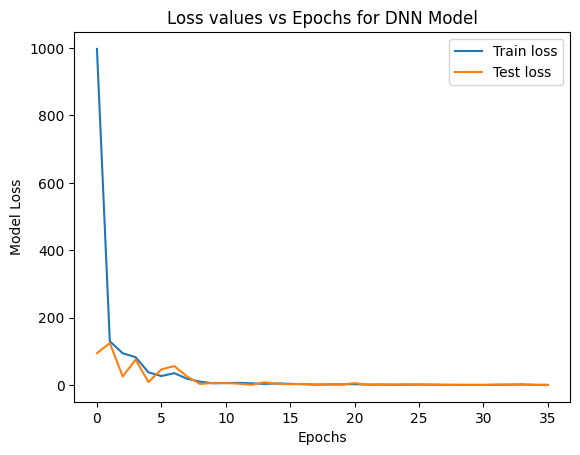

In [1378]:
model_history = model_fit.history
model_epoch = model_fit.epoch

plt.plot(model_epoch, model_history['loss'], label='Train loss')
plt.plot(model_epoch, model_history['val_loss'], label='Test loss')
plt.ylabel('Model Loss')
plt.xlabel('Epochs')
plt.title('Loss values vs Epochs for DNN Model')
plt.legend()
plt.show()

The model shows that only 35 epochs were needed, after that there would be no more imorovement. Both the loss and the val-loss converge around 30 epochs and with that we deduce that no overfitting is occuring. The training and testing scores below indicate the same sentiment.

In [1379]:
train_score = model.evaluate(X_train, y_train)[1]
test_score = model.evaluate(X_test, y_test)[1]


print(f'Train accuracy score:\n{train_score}\n\nTest accuracy score:\n{test_score}')

349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.5769 - loss: 0.7638
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.5582 - loss: 0.7742
Train accuracy score:
0.5733895301818848

Test accuracy score:
0.5688572525978088


In [1380]:
import numpy as np
preds = model.predict(X_test)
# print(preds)

preds = preds.reshape((4778,))

prediction_df = pd.DataFrame({
    'true_labels': y_test,
    'predictions': preds
})

prediction_df.head(10)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step


,true_labels,predictions
0,0,0.606603
1,0,0.592415
2,0,0.456521
3,0,0.587216
4,0,0.496500
5,0,0.627963
6,1,0.616632
7,0,0.591861
8,1,0.621260
9,0,0.600235


## Hyper-parameter tuning
- with this step taking a considerable amount of time I commented it out

In [1381]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
# from scikeras.wrappers import KerasClassifier
# keras.wrappers.scikit_learn.KerasClassifier
# import KerasClassifier

# def create_model(neurons, learning_rate, nl):
#     model = keras.Sequential()
#     model.add(keras.layers.Input((20,)))
#     for i in nl:
#         model.add(keras.layers.Dense(neurons, activation='relu'))
#     model.add(keras.layers.Dense(1, activation='sigmoid'))
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# model = KerasClassifier(build_fn=create_model, neurons=32, learning_rate=.001, epochs=150, nl=1)

# params = {
#     'epochs': [150],
#     'neurons': [64,128],
#     'learning_rate': [.001, .01],
#     'nl': [1,2,3]
# }

# model_grid = RandomizedSearchCV(estimator=model, param_distributions=params, cv=3, verbose=2, random_state=RANDOM_STATE, n_jobs=-1, scoring='accuracy')

# model_results = model_grid.fit(X_train[:10], y_train[:10])
# print(f'Best score: {model_results.best_score_}\n\nBest params: {model_results.best_params_}')


# Save model

In [1382]:
import pickle

with open('../final_models/keras_model', 'wb') as model:
    pickle.dump(model_fit, model)